In [60]:
import sys
sys.path.append("..")  # <-  This should point to the root directory of the project relative to this file

from custom_scripts import database
from custom_scripts import preprocessing

# This assumes that the taxiing phases are always according to the schadual. I can do a better job if we have log, lat of the origin
# and dest because all the phases of the flights before take-off and after landing are in local time
flights_query =  f"""
                SELECT fl_date, op_carrier_fl_num, arr_delay, (air_time - crs_elapsed_time + taxi_out+taxi_in) AS delay_compensate FROM flights
                WHERE fl_date BETWEEN  '2019-01-01' AND '2019-01-02';
                """

flights = database.query(flights_query)
flights.head()

,fl_date,op_carrier_fl_num,arr_delay,delay_compensate
0,2019-01-01,5621,0.0,1.0
1,2019-01-01,5606,-3.0,-4.0
2,2019-01-01,5607,6.0,-15.0
3,2019-01-01,5607,14.0,10.0
4,2019-01-01,5608,-12.0,-7.0


# For Visualization

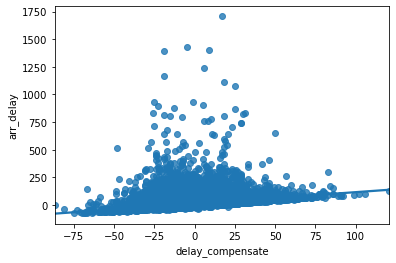

,op_carrier_fl_num,arr_delay,delay_compensate
count,41994.000000,41584.000000,41584.000000
mean,2823.387151,7.724846,-4.781911
std,1942.139060,48.637205,14.525290
min,1.000000,-76.000000,-87.000000
25%,1142.000000,-14.000000,-13.000000
50%,2331.000000,-3.000000,-6.000000
75%,4557.000000,14.000000,2.000000
max,9381.000000,1707.000000,121.000000


In [61]:
import seaborn as sns
sns.regplot(x="delay_compensate", y="arr_delay", data=flights)
plt.show()
flights.describe()

# Adjusting the dataframe for Brian's classification

In [62]:
flights = flights.assign(Delayed=False)

In [63]:
filter_delay = flights['arr_delay']>=15
flights[filter_delay]=True
flights.head()

,fl_date,op_carrier_fl_num,arr_delay,delay_compensate,Delayed
0,2019-01-01,5621,0,1,False
1,2019-01-01,5606,-3,-4,False
2,2019-01-01,5607,6,-15,False
3,2019-01-01,5607,14,10,False
4,2019-01-01,5608,-12,-7,False


In [64]:
flights.describe()

,fl_date,op_carrier_fl_num,arr_delay,delay_compensate,Delayed
count,41994,41994,41584.0,41584.0,41994
unique,3,6372,84.0,103.0,2
top,2019-01-02,True,1.0,1.0,False
freq,16575,10107,10863.0,10964.0,31897
